# Loading Data

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt 

# File paths
data_dir = "./data"

# Loading data 
data_file = ["creditcard.csv"]
file_path = os.path.join(data_dir, data_file[0])
df = pd.read_csv(file_path, header=0)


### The Dataset 
It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, we cannot provide the original features and more background information about the data

Scaling: Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Exploration 

In [3]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
## Could Be worth seperating fraud and non fraud cases into seperate data sets and comparing, for example their "amount" features
## with the describe function, just to get an idea of how he amount spent on real vs fraudulent transactions differ
print("Amount details of the fraudulent transactions")
print(fraud[["Amount"]].describe())
print("-"*50)
print("Amount details of the valid transactions")
print(valid[["Amount"]].describe())

Amount details of the fraudulent transactions
            Amount
count   492.000000
mean    122.211321
std     256.683288
min       0.000000
25%       1.000000
50%       9.250000
75%     105.890000
max    2125.870000
--------------------------------------------------
Amount details of the valid transactions
              Amount
count  284315.000000
mean       88.291022
std       250.105092
min         0.000000
25%         5.650000
50%        22.000000
75%        77.050000
max     25691.160000


### Outlier Detection

In [4]:
import pandas as pd

# Function to detect outliers in all numeric columns using the IQR method
def detect_outliers_iqr(df):
    """
    Detects outliers in all numeric columns of a DataFrame using the IQR method.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.

    Returns:
    dict: Dictionary with column names as keys and DataFrames of outliers as values.
    """
    outliers_dict = {}  # Dictionary to store outliers for each column
    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        # Store the results in a dictionary
        outliers_dict[column] = outliers

        # Print column-specific results
        print(f"Column: {column}")
        print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(f"Number of Outliers: {len(outliers)}\n")
    
    return outliers_dict

# Example Usage
# Replace `df` with your actual DataFrame
outliers = detect_outliers_iqr(df)

# Access outliers for a specific column, e.g., 'Amount'
print("Outliers in 'Amount':")
print(outliers['Amount'])


Column: Time
Q1: 54201.5, Q3: 139320.5, IQR: 85119.0
Lower Bound: -73477.0, Upper Bound: 266999.0
Number of Outliers: 0

Column: V1
Q1: -0.920373384390322, Q3: 1.315641693877865, IQR: 2.236015078268187
Lower Bound: -4.274396001792603, Upper Bound: 4.669664311280146
Number of Outliers: 7062

Column: V2
Q1: -0.598549913464916, Q3: 0.8037238712400945, IQR: 1.4022737847050104
Lower Bound: -2.7019605905224315, Upper Bound: 2.90713454829761
Number of Outliers: 13526

Column: V3
Q1: -0.8903648381551406, Q3: 1.027195542465555, IQR: 1.9175603806206956
Lower Bound: -3.7667054090861836, Upper Bound: 3.9035361133965982
Number of Outliers: 3363

Column: V4
Q1: -0.848640116331273, Q3: 0.7433412894685876, IQR: 1.5919814057998605
Lower Bound: -3.236612225031064, Upper Bound: 3.1313133981683787
Number of Outliers: 11148

Column: V5
Q1: -0.6915970708876575, Q3: 0.611926439735193, IQR: 1.3035235106228504
Lower Bound: -2.646882336821933, Upper Bound: 2.5672117056694685
Number of Outliers: 12295

Column: V

In [5]:

x=df.iloc[:,:-1]
y=df.iloc[:,-1]

print(x.shape,y.shape)

(284807, 30) (284807,)


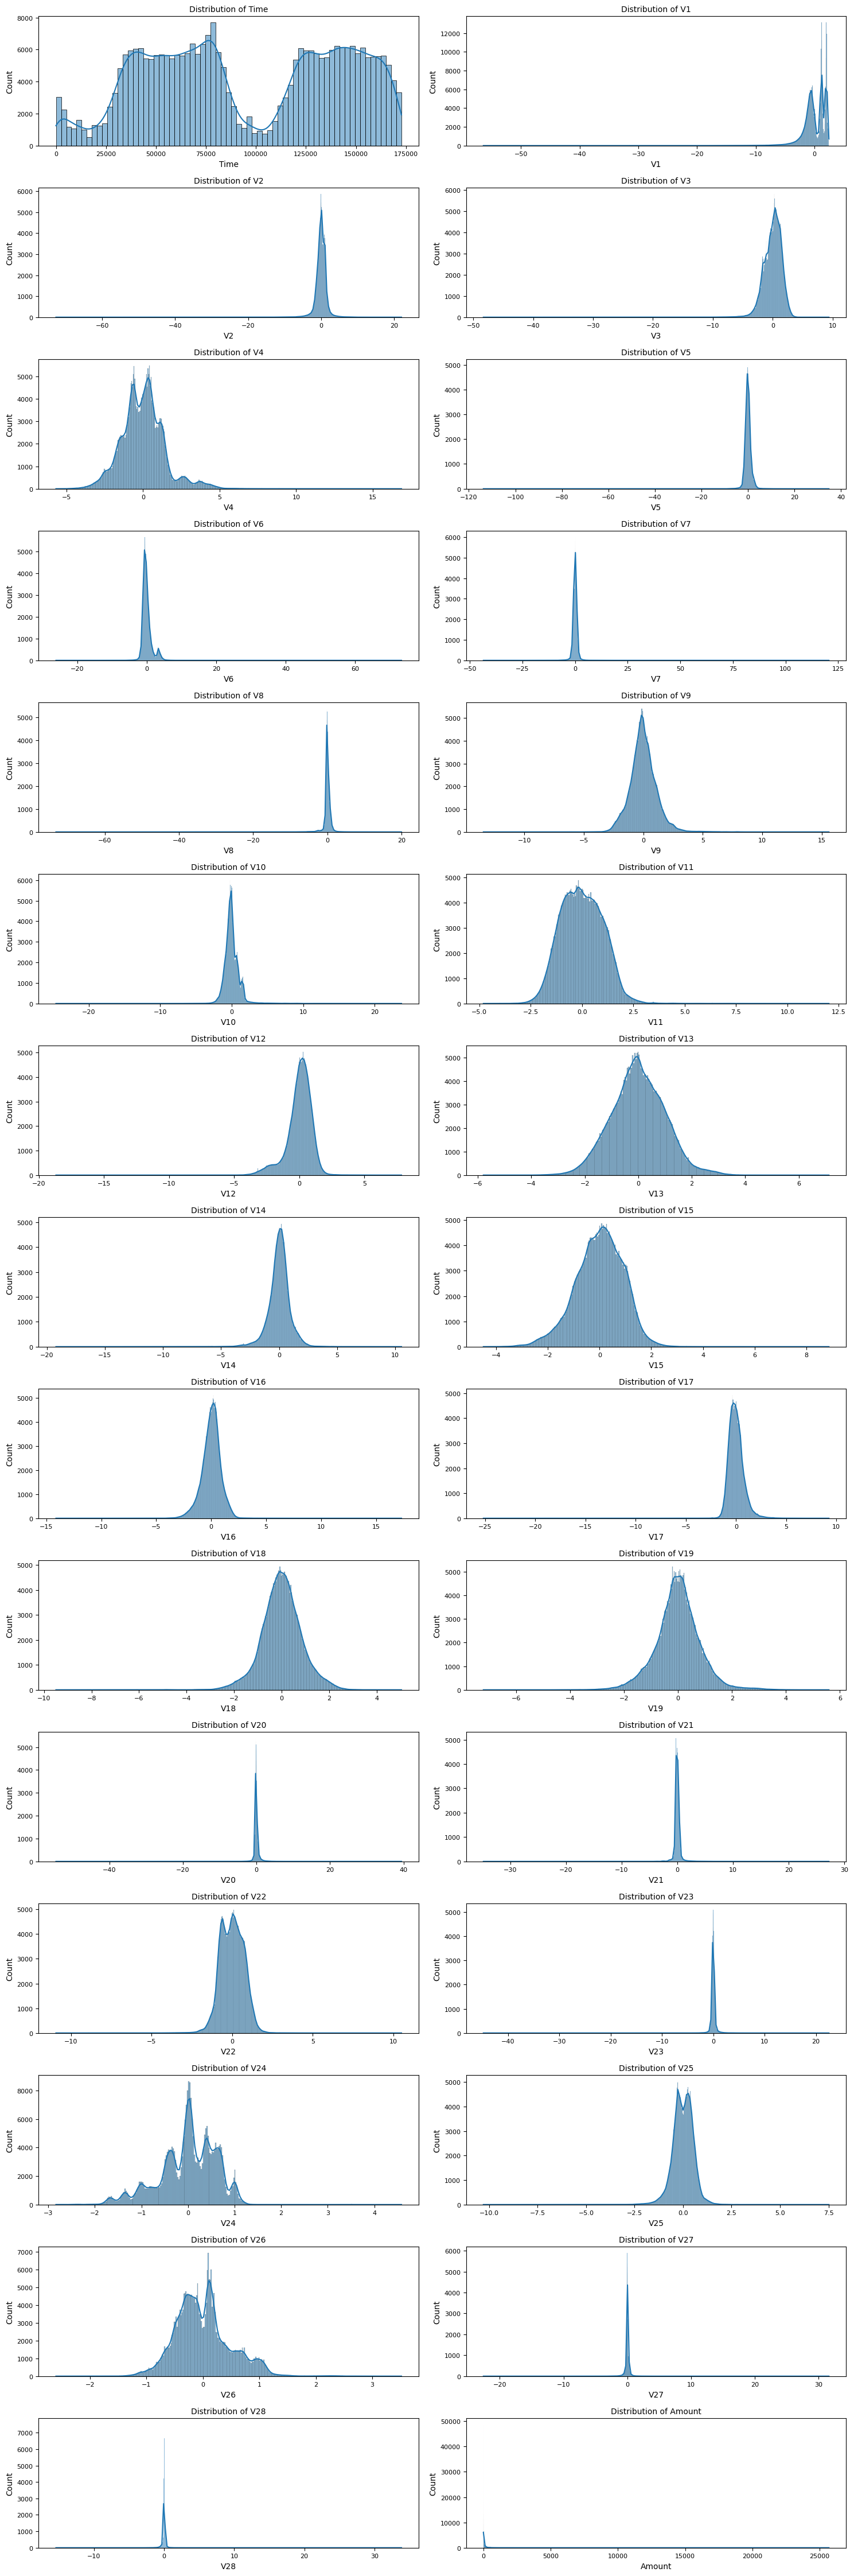

In [72]:

num_cols = len(x.columns)
num_rows = (num_cols + 1) // 2  # Divide columns into two per row

# Create subplots dynamically
plt.figure(figsize=(15, num_rows * 3)) 
i = 1

for col in x.columns:
    plt.subplot(num_rows, 2, i)  # Create a subplot grid dynamically
    sns.histplot(x[col], kde=True)  # Add KDE for better visualization
    plt.title(f"Distribution of {col}", fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    i += 1

plt.tight_layout()
plt.show()


In [6]:
from sklearn.ensemble import IsolationForest

# Fit the Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)  # Adjust contamination as needed
df['anomaly'] = iso.fit_predict(df[['Amount']])  # Replace 'Amount' with the column(s) of interest

# -1 indicates an outlier
outliers_iso = df[df['anomaly'] == -1]

print(f"Number of outliers using Isolation Forest: {len(outliers_iso)}")


Number of outliers using Isolation Forest: 2776


In [7]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 Time       0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
Amount     0
Class      0
anomaly    0
dtype: int64


#### Class Distribution 
Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (017%) of the time in the dataframe.

Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


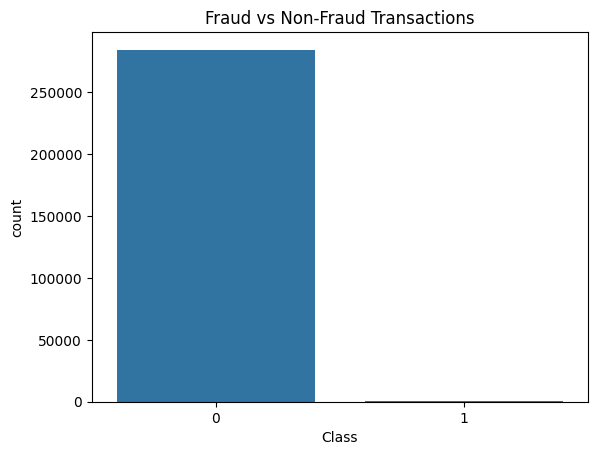

In [8]:
print("Class Distribution:\n", df['Class'].value_counts())

# Visualize class imbalance
sns.countplot(x='Class', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()


### Scaling and Distributing

In [9]:
from sklearn.preprocessing import RobustScaler


rob_scaler = RobustScaler()
original_amount = df['Amount']
original_time = df['Time']

# Scale the columns

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)


In [10]:

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,anomaly
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,1


##### Export Edited df to csv
    ONLY RUN THIS CELL IF YOUR DATA FOLDER DOES NOT ALREADY CONTAIN "credit_card_scaled_and_cleaned.csv", It does nothing besides create it
    

In [18]:
# File paths
data_dir = "./data"

# Loading data 
data_file = ["credit_card_scaled_and_cleaned.csv"]
file_path = os.path.join(data_dir, data_file[0])
df.to_csv(file_path, index= False)


##### Sub-sampling
1. Randomly select 492 non-fraud cases to match the number of fraud cases (492).
2. Combine these with the 492 fraud cases.

In [11]:
# Separate the fraud and non-fraud transactions
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Randomly sample 492 non-fraud transactions
non_fraud_sample = non_fraud.sample(n=len(fraud), random_state=42)

# Combine the fraud and non-fraud samples
balanced_df = pd.concat([fraud, non_fraud_sample])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_df['Class'].value_counts())  # Should show a 50/50 distribution


Class
0    492
1    492
Name: count, dtype: int64


Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


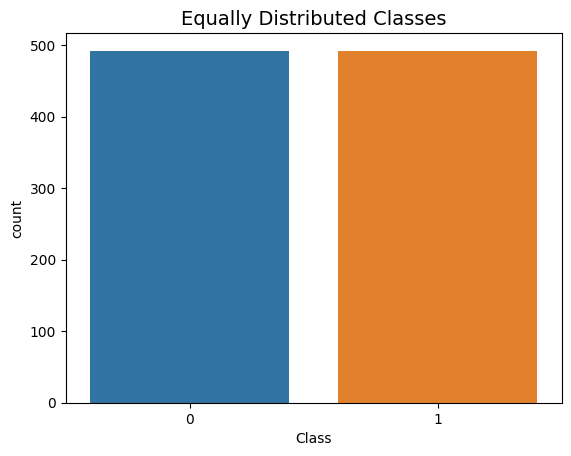

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print the distribution of classes in the balanced dataset
print('Distribution of the Classes in the subsample dataset')
print(balanced_df['Class'].value_counts() / len(balanced_df))

# Define the colors for the plot
colors = ['#1f77b4', '#ff7f0e']  # Blue for non-fraud, orange for fraud

# Plot the distribution
sns.countplot(x='Class', data=balanced_df, palette=colors,  hue='Class',
    legend=False)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()


##### Export balanced_df to csv
    ONLY RUN THIS CELL IF YOUR DATA FOLDER DOES NOT ALREADY CONTAIN "balanced_credit_card.csv", It does nothing besides create it

In [21]:
# File paths
data_dir = "./data"

# Loading data 
data_file = ["balanced_credit_card.csv"]
file_path = os.path.join(data_dir, data_file[0])
balanced_df.to_csv(file_path, index= False)


##### Sub-sampling (again)
1. Randomly select 984 non-fraud cases to double the number of fraud cases (492).
2. Combine these with the 492 fraud cases.

In [ ]:
# Randomly sample 984 non-fraud transactions
non_fraud_sample_2 = non_fraud.sample(n=len(fraud)*2, random_state=42)

# Combine the fraud and non-fraud samples
semi_balanced_df = pd.concat([fraud, non_fraud_sample_2])

# Shuffle the dataset
semi_balanced_df = semi_balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(semi_balanced_df['Class'].value_counts())  # Should show a 66.6/33.3 distribution

Class
0    984
1    492
Name: count, dtype: int64


Distribution of the Classes in the subsample dataset
Class
0    0.666667
1    0.333333
Name: count, dtype: float64


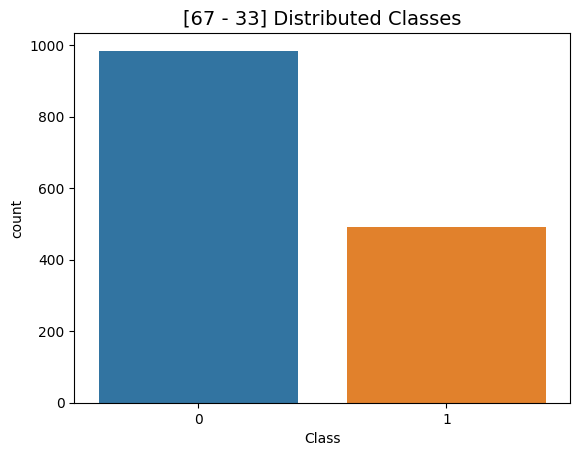

In [ ]:
# Print the distribution of classes in the semi balanced dataset
print('Distribution of the Classes in the subsample dataset')
print(semi_balanced_df['Class'].value_counts() / len(semi_balanced_df))

# Define the colors for the plot
colors = ['#1f77b4', '#ff7f0e']  # Blue for non-fraud, orange for fraud

# Plot the distribution
sns.countplot(x='Class', data=semi_balanced_df, palette=colors,  hue='Class',
    legend=False)
plt.title('[67 - 33] Distributed Classes', fontsize=14)
plt.show()


##### Export Edited df to csv
    ONLY RUN THIS CELL IF YOUR DATA FOLDER DOES NOT ALREADY CONTAIN "semi_balanced_credit_card.csv", It does nothing besides create it

In [ ]:
# File paths
data_dir = "./data"

# Loading data 
data_file = ["semi_balanced_credit_card.csv"]
file_path = os.path.join(data_dir, data_file[0])
semi_balanced_df.to_csv(file_path, index= False)

## Exploratory Analysis

Could use the heatmap to justify feature selection, if we have time. 

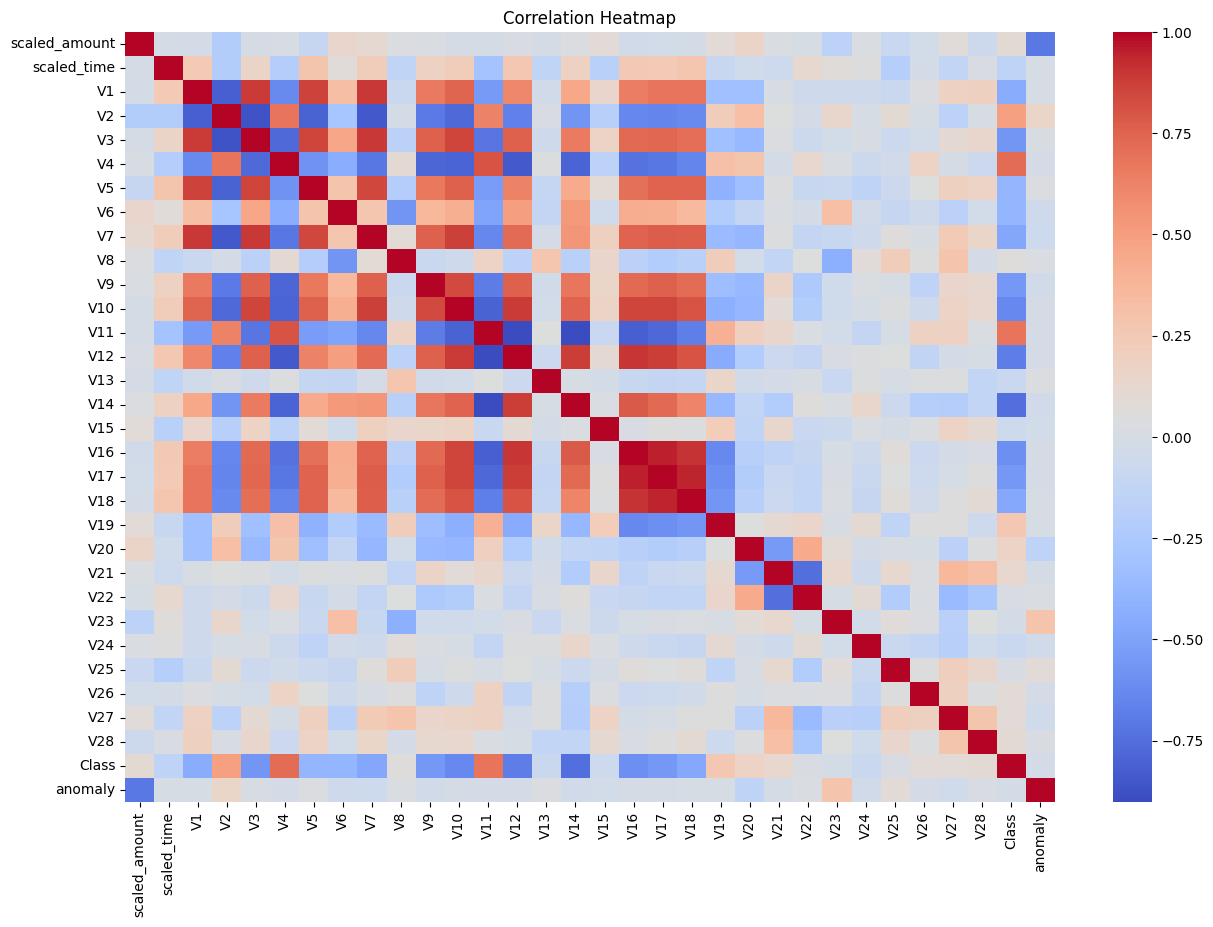

In [14]:


# Compute correlations
correlation_matrix = balanced_df.corr()

# Plot a heatmap of the correlations
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


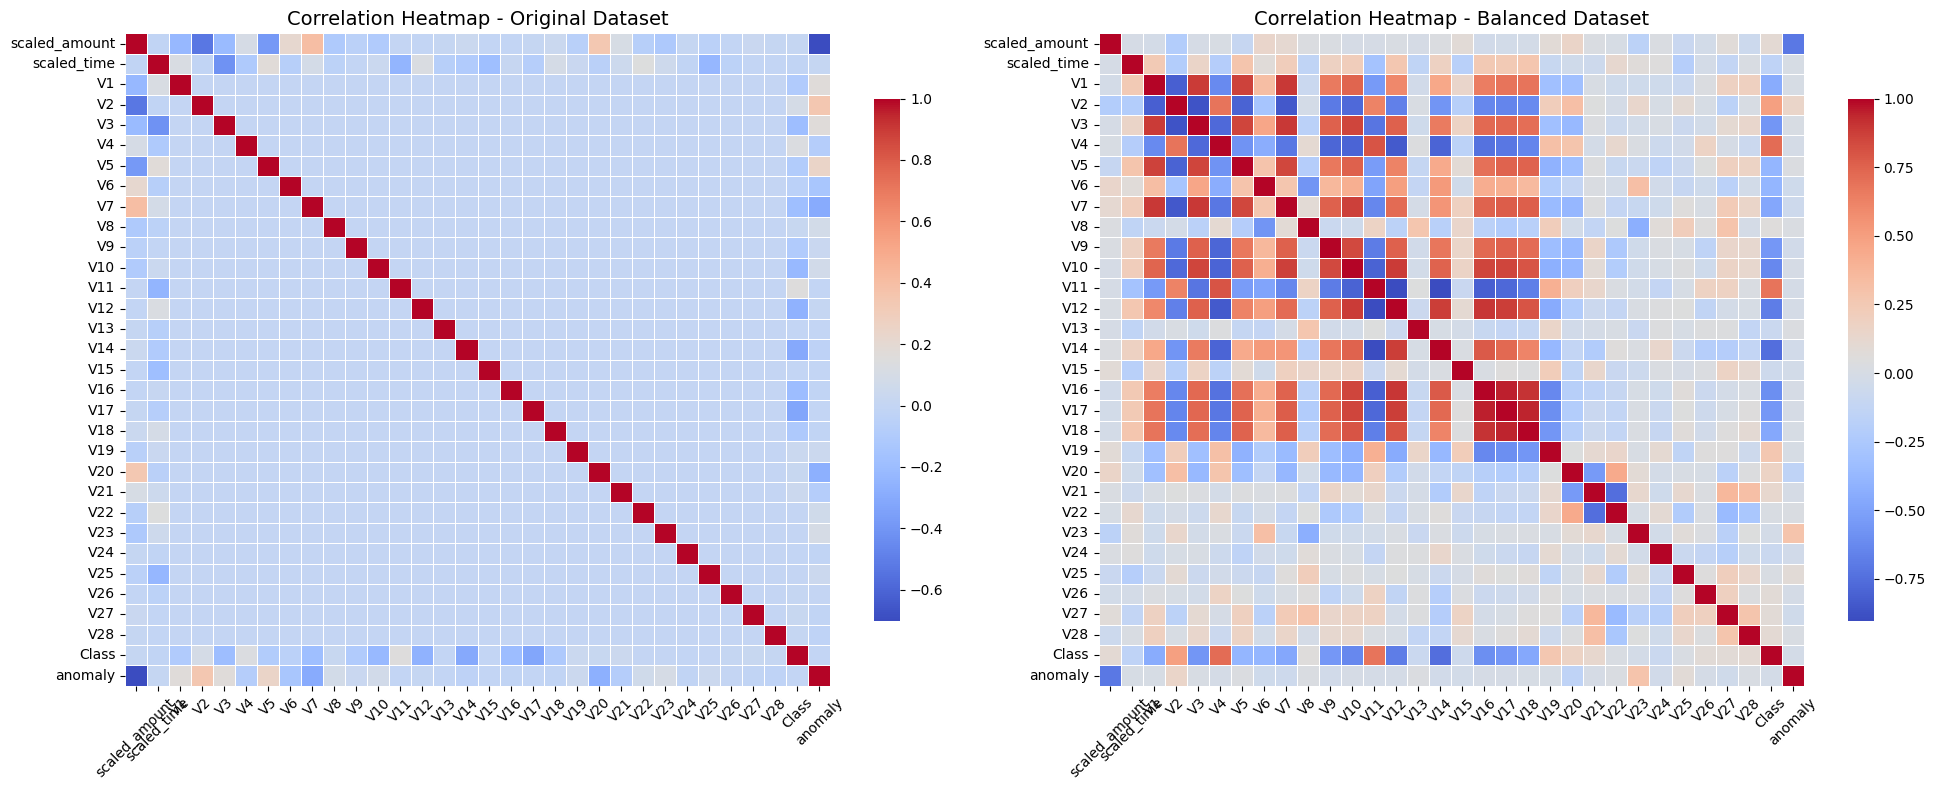

In [15]:


original_corr = df.corr() 
balanced_corr = balanced_df.corr()  


fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap for the original dataset
sns.heatmap(
    original_corr,
    cmap="coolwarm",
    annot=False,
    fmt=".2f",
    linewidths=0.5,
    ax=axes[0],
    cbar_kws={"shrink": 0.8}
)
axes[0].set_title("Correlation Heatmap - Original Dataset", fontsize=14)
axes[0].tick_params(axis='x', labelrotation=45)
axes[0].tick_params(axis='y', labelrotation=0)

# Heatmap for the balanced dataset
sns.heatmap(
    balanced_corr,
    cmap="coolwarm",
    annot=False,
    fmt=".2f",
    linewidths=0.5,
    ax=axes[1],
    cbar_kws={"shrink": 0.8}
)
axes[1].set_title("Correlation Heatmap - Balanced Dataset", fontsize=14)
axes[1].tick_params(axis='x', labelrotation=45)
axes[1].tick_params(axis='y', labelrotation=0)

plt.tight_layout()
plt.show()


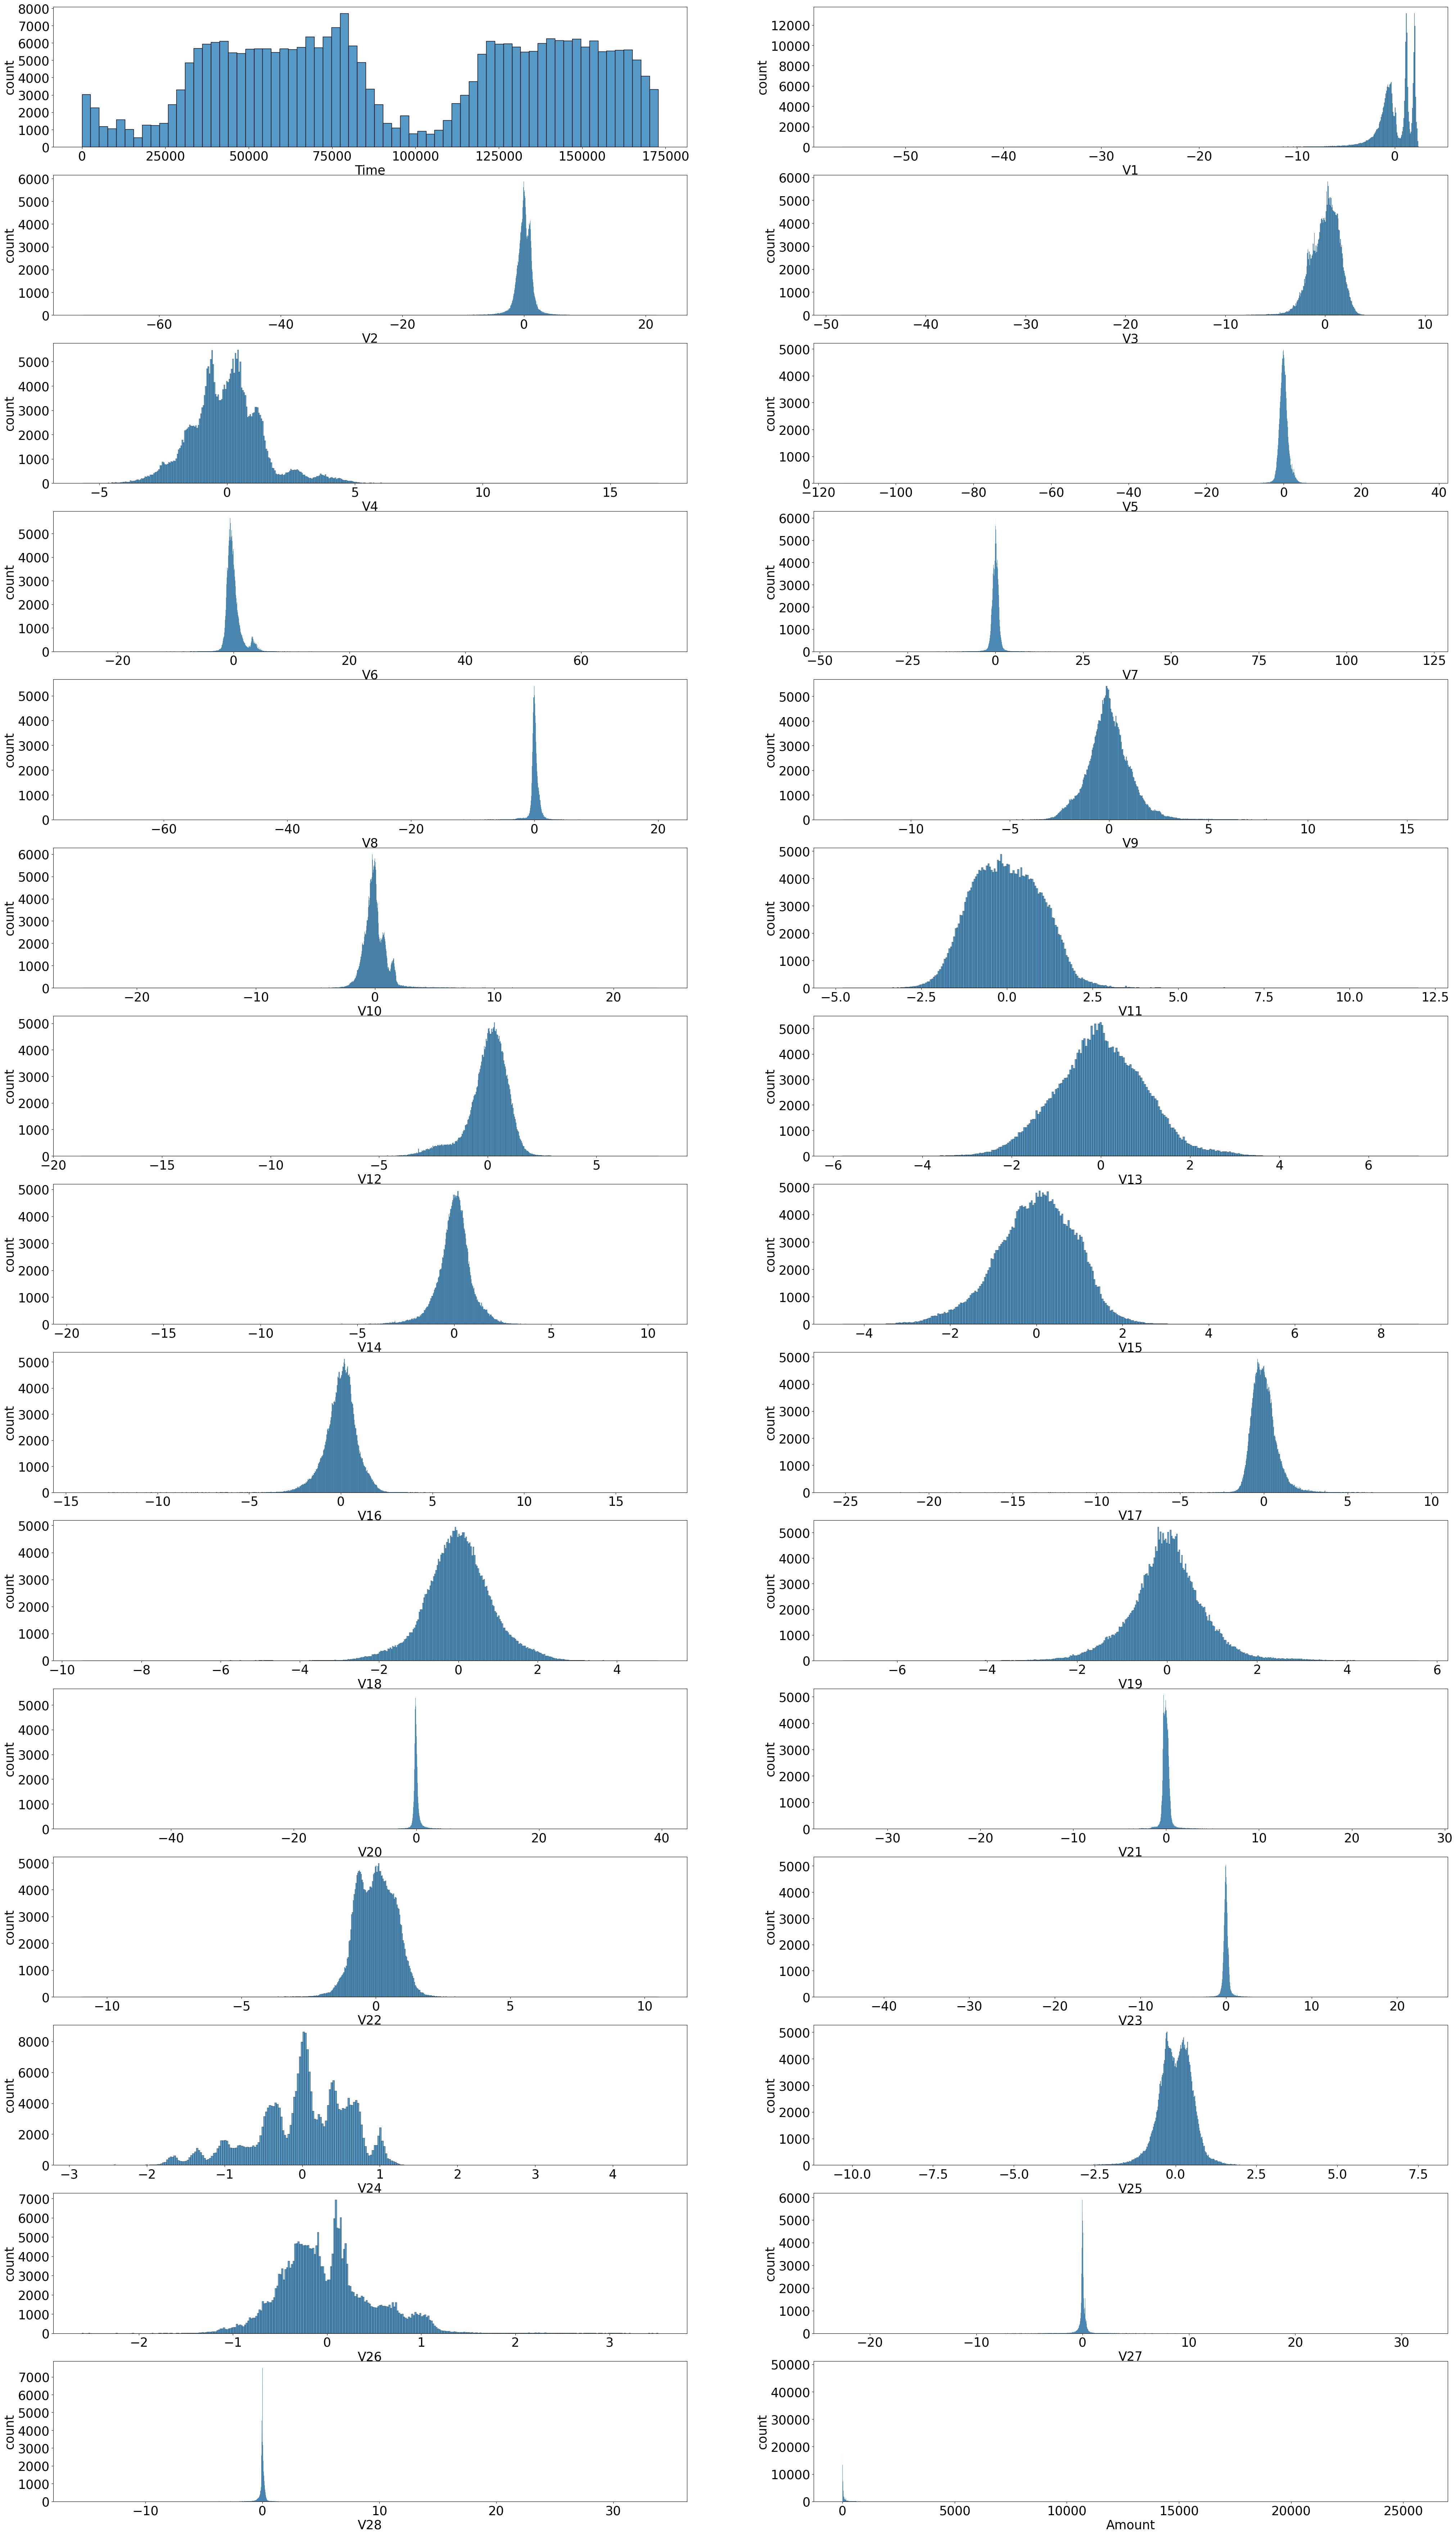

In [50]:
plt.figure(figsize=(50,90))
i=1
for col in x.columns:
    plt.subplot(15,2,i)
    sns.histplot(x[col])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    i+=1
plt.show()

### Modeling:

In [ ]:
## I think for now we should split the data into testing and training, we will have to seperate the class attribute from the rest of the data. 
## We could use also use k-fold cross validation to test model hyperparams if we wanted to as well
## I think we should start with simple, easy to tune models like SVM and Logistic regressions then compare those to more complex models like a random forest or a neural net. 
## It could also be worth seeing how the non-scaled data set performs as compared to the scaled one

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

Split the Data into Training and Testing Sets
Separate the Class attribute (target) from the rest of the features, and split the dataset into training and testing set

In [20]:
# Split balanced dataset
X_balanced = balanced_df.drop('Class', axis=1)
y_balanced = balanced_df['Class']

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.3, stratify=y_balanced, random_state=42
)


#### Logistic Regression:

In [21]:
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression model and parameters
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_params = {
    'C': [0.01, 0.1, 1, 10],        # Regularization strength
    'penalty': ['l1', 'l2'],        # Type of regularization
    'solver': ['liblinear']         # Solver that supports L1 and L2
}


### SVM:

In [22]:
from sklearn.svm import SVC

# Define SVM model and parameters
svm_model = SVC(probability=True, random_state=42)  # Enable probability=True for ROC AUC
svm_params = {
    'C': [0.1, 1, 10],             # Regularization strength
    'kernel': ['linear', 'rbf'],   # Kernel type
    'gamma': ['scale', 'auto']     # Kernel coefficient
}


### Random Forest:

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Define Random Forest model and parameters
rf_model = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],   # Number of trees
    'max_depth': [None, 10, 20],      # Maximum depth of each tree
    'min_samples_split': [2, 5],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2]        # Minimum samples in a leaf node
}


### Defining Scoring Metrics:

In [26]:

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, response_method='predict_proba')
}


#### Define Stratified K-Fold cross-validator:

In [ ]:
## Are these just trained for generally best params or are they trained to have the best params for the data? 
## I feel like we should attempt to train these for our dataset(s) specifically if (if they arent already) so as to get the best results.
## I don't think it's too big a deal though, Our current models are pretty alright (I think)

def train_with_kfold(model, params, model_name):
    grid = GridSearchCV(
        model,
        params,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring=scoring,
        refit='accuracy',
        verbose=1
    )
    grid.fit(X_train_balanced, y_train_balanced)
    
    # Extract cross-validation results
    cv_results = grid.cv_results_
    improvements = []

    print(f"\n{model_name} Cross-Validation Results:")
    print(f"Best Parameters: {grid.best_params_}")

    # Calculate improvements for each metric
    for metric in scoring.keys():
        metric_scores = cv_results[f'mean_test_{metric}']
        top_score = metric_scores.max()
        lowest_score = metric_scores.min()
        improvements.append({
            "Metric": metric.capitalize(),
            "Top Score": top_score,
            "Lowest Score": lowest_score,
            "Difference": top_score - lowest_score
        })
        print(f"{metric.capitalize()}: Top={top_score:.4f}, Lowest={lowest_score:.4f}, Difference={top_score - lowest_score:.4f}")
    
    # Return the trained model and improvements
    return grid.best_estimator_, pd.DataFrame(improvements)

# Train each model
best_lr, lr_improvements = train_with_kfold(lr_model, lr_params, "Logistic Regression")
best_svm, svm_improvements = train_with_kfold(svm_model, svm_params, "Support Vector Machine (SVM)")
best_rf, rf_improvements = train_with_kfold(rf_model, rf_params, "Random Forest")


Fitting 5 folds for each of 8 candidates, totalling 40 fits

Logistic Regression Cross-Validation Results:
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: Top=0.9433, Lowest=0.7820, Difference=0.1614
Precision: Top=0.9781, Lowest=0.7085, Difference=0.2696
Recall: Top=0.9594, Lowest=0.9012, Difference=0.0582
F1: Top=0.9416, Lowest=0.8148, Difference=0.1268
Roc_auc: Top=0.9852, Lowest=0.9637, Difference=0.0214
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Support Vector Machine (SVM) Cross-Validation Results:
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: Top=0.9462, Lowest=0.9128, Difference=0.0335
Precision: Top=0.9902, Lowest=0.9039, Difference=0.0863
Recall: Top=0.9302, Lowest=0.8460, Difference=0.0843
F1: Top=0.9437, Lowest=0.9115, Difference=0.0322
Roc_auc: Top=0.9825, Lowest=0.9666, Difference=0.0159
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Random Forest Cross-Validation Results:
Best Parame

### Cross-Validation Improvements Table:

In [30]:
print("\nCross-Validation Improvements:")
print("Logistic Regression Improvements:\n", lr_improvements)
print("SVM Improvements:\n", svm_improvements)
print("Random Forest Improvements:\n", rf_improvements)



Cross-Validation Improvements:
Logistic Regression Improvements:
       Metric  Top Score  Lowest Score  Difference
0   Accuracy   0.943330      0.781974    0.161356
1  Precision   0.978102      0.708533    0.269568
2     Recall   0.959378      0.901151    0.058227
3         F1   0.941632      0.814850    0.126782
4    Roc_auc   0.985169      0.963721    0.021448
SVM Improvements:
       Metric  Top Score  Lowest Score  Difference
0   Accuracy   0.946250      0.912779    0.033471
1  Precision   0.990206      0.903868    0.086339
2     Recall   0.930222      0.845951    0.084271
3         F1   0.943685      0.911489    0.032196
4    Roc_auc   0.982480      0.966610    0.015870
Random Forest Improvements:
       Metric  Top Score  Lowest Score  Difference
0   Accuracy   0.937544      0.930276    0.007268
1  Precision   0.977894      0.968325    0.009569
2     Recall   0.895354      0.889557    0.005797
3         F1   0.934498      0.926919    0.007580
4    Roc_auc   0.978219      0.9756

### Test All Models on the balanced Dataset (df):


In [ ]:
## If we intend to implement more graphing and visualizations later on, like with a confusion matrix or roc curves, this code (and all other model testing code chunks) will likely have to be modified

def evaluate_on_balanced(model, model_name):
    y_pred = model.predict(X_test_balanced)
    y_proba = model.predict_proba(X_test_balanced)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test_balanced, y_pred)
    precision = precision_score(y_test_balanced, y_pred)
    recall = recall_score(y_test_balanced, y_pred)
    f1 = f1_score(y_test_balanced, y_pred)
    roc_auc = roc_auc_score(y_test_balanced, y_proba) if y_proba is not None else "N/A"


    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }

# Evaluate models on balanced test set
balanced_results = []
balanced_results.append(evaluate_on_balanced(best_lr, "Logistic Regression"))
balanced_results.append(evaluate_on_balanced(best_svm, "SVM"))
balanced_results.append(evaluate_on_balanced(best_rf, "Random Forest"))


### Test on the Original Data set:

In [ ]:
## If we intend to implement more graphing and visualizations later on, like with a confusion matrix or roc curves, this code (and all other model testing code chunks) will likely have to be modified

X_orig = df.drop('Class', axis=1)
y_orig = df['Class']

def evaluate_on_original(model, model_name):
    y_pred = model.predict(X_orig)
    y_proba = model.predict_proba(X_orig)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_orig, y_pred)
    precision = precision_score(y_orig, y_pred)
    recall = recall_score(y_orig, y_pred)
    f1 = f1_score(y_orig, y_pred)
    roc_auc = roc_auc_score(y_orig, y_proba) if y_proba is not None else "N/A"

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }

# Evaluate models on original dataset
original_results = []
original_results.append(evaluate_on_original(best_lr, "Logistic Regression"))
original_results.append(evaluate_on_original(best_svm, "SVM"))
original_results.append(evaluate_on_original(best_rf, "Random Forest"))


### Balanced Dataset Results Table:


In [31]:
balanced_results_df = pd.DataFrame(balanced_results)
print("\nEvaluation on Balanced Dataset's Test Set:")
print(balanced_results_df)



Evaluation on Balanced Dataset's Test Set:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.932432   0.944444  0.918919  0.931507  0.970645
1                  SVM  0.932432   0.970588  0.891892  0.929577  0.981602
2        Random Forest  0.935811   0.964029  0.905405  0.933798  0.971398


### Original Dataset Results Table:

In [32]:
original_results_df = pd.DataFrame(original_results)
print("\nEvaluation on Original Dataset:")
print(original_results_df)



Evaluation on Original Dataset:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.960728   0.039214  0.924797  0.075238  0.983600
1                  SVM  0.975756   0.061534  0.914634  0.115311  0.985976
2        Random Forest  0.967079   0.048577  0.971545  0.092528  0.990327


### Analysis:

While the models tested on the Original dataset gave better Accuracy and Recall results, thier precision and F1 score results were notably VERY bad. On the other hand The models trained on the Balanced Set yeilded more balanced results, with worse scores in every catagory except precision and F1, where they outperformed the models trained on the original dataset. These results however, are realistically to be expected. We knew from the beginning that, due to the extreme imbalance in the dataset, ROC AUC would end up being a far better measure off model quality than confusion matrix metrics.

That said, we would now like to try training models on a semi-balanced dataset in order to compare results further.

Split the Data into Training and Testing Sets
Separate the Class attribute (target) from the rest of the features, and split the dataset into training and testing set

In [37]:
# Split semi balanced dataset
X_semi_balanced = semi_balanced_df.drop('Class', axis=1)
y_semi_balanced = semi_balanced_df['Class']

X_train_semi_balanced, X_test_semi_balanced, y_train_semi_balanced, y_test_semi_balanced = train_test_split(
    X_semi_balanced, y_semi_balanced, test_size=0.3, stratify=y_semi_balanced, random_state=42
)


### Test All Models on the Semi Balanced Dataset (df):

In [ ]:
## If we intend to implement more graphing and visualizations later on, like with a confusion matrix or roc curves, this code (and all other model testing code chunks) will likely have to be modified

def evaluate_on_semi_balanced(model, model_name):
    y_pred = model.predict(X_test_semi_balanced)
    y_proba = model.predict_proba(X_test_semi_balanced)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test_semi_balanced, y_pred)
    precision = precision_score(y_test_semi_balanced, y_pred)
    recall = recall_score(y_test_semi_balanced, y_pred)
    f1 = f1_score(y_test_semi_balanced, y_pred)
    roc_auc = roc_auc_score(y_test_semi_balanced, y_proba) if y_proba is not None else "N/A"

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }

# Evaluate models on semi balanced test set
semi_balanced_results = []
semi_balanced_results.append(evaluate_on_semi_balanced(best_lr, "Logistic Regression"))
semi_balanced_results.append(evaluate_on_semi_balanced(best_svm, "SVM"))
semi_balanced_results.append(evaluate_on_semi_balanced(best_rf, "Random Forest"))

In [ ]:
## Printing the results data frame of the semi_balanced data and other data sets for easier comparison (because graphing didnt go as smoothly as I wouldve liked)

semi_balanced_results_df = pd.DataFrame(semi_balanced_results)
print("\nEvaluation on Semi Balanced Dataset's Test Set:")
print(semi_balanced_results_df)
print("-"*74)
print("\nEvaluation on Original Dataset:")
print(original_results_df)
print("-"*74)
print("\nEvaluation on Balanced Dataset's Test Set:")
print(balanced_results_df)


Evaluation on Semi Balanced Dataset's Test Set:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.943567   0.948905  0.878378  0.912281  0.982158
1                  SVM  0.950339   0.977273  0.871622  0.921429  0.983349
2        Random Forest  0.977427   0.960000  0.972973  0.966443  0.989739
--------------------------------------------------------------------------

Evaluation on Original Dataset:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.960728   0.039214  0.924797  0.075238  0.983600
1                  SVM  0.975756   0.061534  0.914634  0.115311  0.985976
2        Random Forest  0.967079   0.048577  0.971545  0.092528  0.990327
--------------------------------------------------------------------------

Evaluation on Balanced Dataset's Test Set:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.932432   0.944444  0.918919  0.9

### Unfinished / Test Code:

<Axes: title={'center': 'Grouped Bar Graph with dataframe'}, xlabel='Model'>

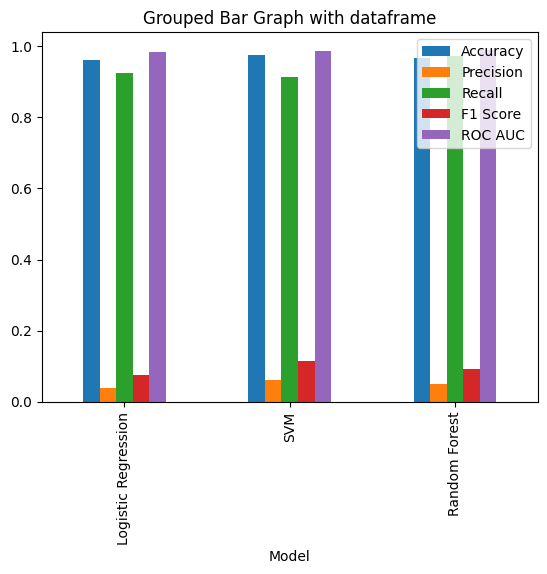

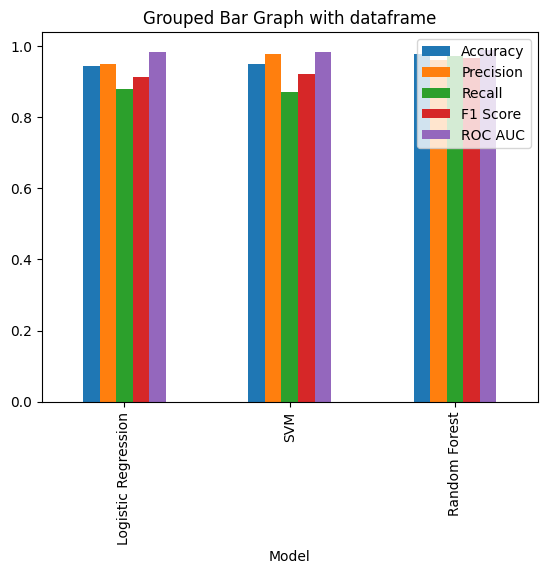

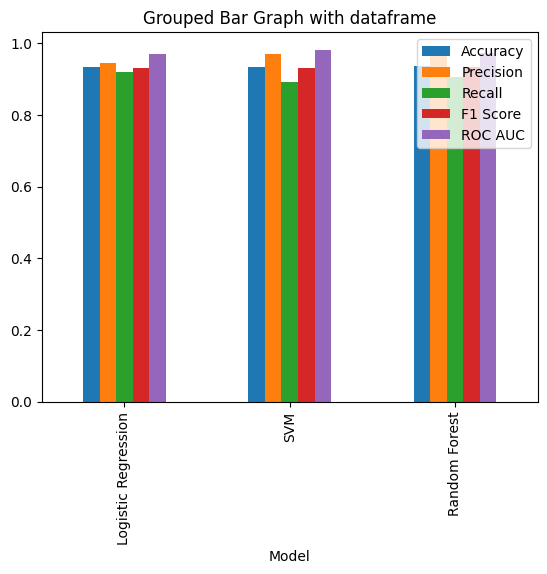

In [ ]:
## This Code is bad and the plots it creates are ugly and unhelpful.

## I would like to make it so I generate 3 plots, one for each model [logistic regression, SVM, and Random Forest], 
        ## where the y axis represents the score, the x ticks represent the 5 things were scoring on, [accuracy, precision, recall, F1 Score, ROC AUC]
        ## and the three bars represent the three different datasets we tested on, complete, balanced, and semi_balanced
        ## Doing this would likely require the creation of a (maybe several) new dataframe(s) created from the results of our current ".._results_df"s and use of matplotlib's plt.bar
original_results_df.plot(x='Model', 
        kind='bar', 
        stacked=False, 
        title='Grouped Bar Graph with dataframe') 

semi_balanced_results_df.plot(x='Model', 
        kind='bar', 
        stacked=False, 
        title='Grouped Bar Graph with dataframe') 

balanced_results_df.plot(x='Model', 
        kind='bar', 
        stacked=False, 
        title='Grouped Bar Graph with dataframe') 
